# Programming Pay Prediction 2024

Now let's look at the final question of interest.  That is - What will be the average pay for certain programming languages next year (2024) and are they related to the most popular programming languages / average pay for those programming languages from previous years?

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn import preprocessing


%matplotlib inline

df_2017 = pd.read_csv('.\data\stack-overflow-developer-survey-2017\survey_results_public.csv')
df_2018 = pd.read_csv('.\data\stack-overflow-developer-survey-2018\survey_results_public.csv')
df_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_public.csv')
df_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_public.csv')
df_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_public.csv')
df_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_public.csv')
df_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_public.csv')
df_2018.head()

C:\Users\quart\AppData\Local\Temp\ipykernel_13404\927720159.py:15: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('.\data\stack-overflow-developer-survey-2018\survey_results_public.csv')


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [177]:
# split LanguageHaveWorkedWith to array and create temp array
df_2023_temp = df_2023
df_2022_temp = df_2022
df_2021_temp = df_2021
df_2020_temp = df_2020
df_2019_temp = df_2019
df_2023_temp['LanguageHaveWorkedWith'] = df_2023_temp['LanguageHaveWorkedWith'].str.split(';')
df_2022_temp['LanguageHaveWorkedWith'] = df_2022_temp['LanguageHaveWorkedWith'].str.split(';')
df_2021_temp['LanguageHaveWorkedWith'] = df_2021_temp['LanguageHaveWorkedWith'].str.split(';')
df_2020_temp['LanguageWorkedWith'] = df_2020_temp['LanguageWorkedWith'].str.split(';')
df_2019_temp['LanguageWorkedWith'] = df_2019_temp['LanguageWorkedWith'].str.split(';')
df_2019_temp.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [178]:
# get pay data
#create developer only dataframe
developers_23 = df_2023_temp.loc[df_2023_temp['MainBranch'] == 'I am a developer by profession']
developers_22 = df_2022_temp.loc[df_2022_temp['MainBranch'] == 'I am a developer by profession']
developers_21 = df_2021_temp.loc[df_2021_temp['MainBranch'] == 'I am a developer by profession']
developers_20 = df_2020_temp.loc[df_2020_temp['MainBranch'] == 'I am a developer by profession']
developers_19 = df_2019_temp.loc[df_2019_temp['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_median_pay_dev_23 = developers_23[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_22 = developers_22[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_21 = developers_21[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_median_pay_dev_20 = developers_20[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').rename(columns={'ConvertedComp': 'ConvertedCompYearly', 'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
language_median_pay_dev_19 = developers_19[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').rename(columns={'ConvertedComp': 'ConvertedCompYearly', 'LanguageWorkedWith': 'LanguageHaveWorkedWith'})

#count values
language_median_pay_dev_23 = language_median_pay_dev_23.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_22 = language_median_pay_dev_22.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_21 = language_median_pay_dev_21.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_20 = language_median_pay_dev_20.groupby(['LanguageHaveWorkedWith']).median().reset_index()
language_median_pay_dev_19 = language_median_pay_dev_19.groupby(['LanguageHaveWorkedWith']).median().reset_index()

def combine_df(dataframes, years):
    for df, year in zip(dataframes, years):
        df['year'] = year
    #print(type(dataframes[1]))
    return pd.concat(dataframes, axis=0)

df_pay = combine_df([language_median_pay_dev_23, language_median_pay_dev_22, language_median_pay_dev_21, language_median_pay_dev_20, language_median_pay_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageHaveWorkedWith': 'language', 'count': 'LanguageHaveWorkedWithProp'})
df_pay['languageAndYear'] = df_pay['language'] + " " + df_pay['year'].astype(str)

def previous_year(df, value_name):
    previous_year = []
    for index, row in df.iterrows():
        try:
            prev = df[df.languageAndYear == row.language + " " + str(row.year - 1)][value_name].values[0]
        except:
            prev = 0
        previous_year.append(prev)
    return previous_year

df_pay['ConvertedCompPrevYear'] = previous_year(df_pay, "ConvertedCompYearly")
print(df_pay)

                 language  ConvertedCompYearly  year  \
0                     APL              80092.0  2023   
1                     Ada              71502.0  2023   
2                    Apex              80317.0  2023   
3                Assembly              78207.0  2023   
4   Bash/Shell/PowerShell              85655.0  2023   
..                    ...                  ...   ...   
23                  Scala              78000.0  2019   
24                  Swift              58846.5  2019   
25             TypeScript              59904.0  2019   
26                    VBA              55000.0  2019   
27            WebAssembly              74130.0  2019   

               languageAndYear  ConvertedCompPrevYear  
0                     APL 2023                71629.5  
1                     Ada 2023                    0.0  
2                    Apex 2023                    0.0  
3                Assembly 2023                76783.0  
4   Bash/Shell/PowerShell 2023                8

In [179]:
# get percentage languages used
# drop nas split into list and explode into rows
language_count_dev_23 = developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_22 = developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_21 = developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_20 = developers_20.LanguageWorkedWith.dropna(axis=0, how='any').explode()
language_count_dev_19 = developers_19.LanguageWorkedWith.dropna(axis=0, how='any').explode()
#count values
language_count_dev_23 = (language_count_dev_23.value_counts()  / developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_22 = (language_count_dev_22.value_counts()  / developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_21 = (language_count_dev_21.value_counts()  / developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_count_dev_20 = (language_count_dev_20.value_counts()  / developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
language_count_dev_19 = (language_count_dev_19.value_counts()  / developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})

df_language_count_dev = combine_df([language_count_dev_23, language_count_dev_22, language_count_dev_21, language_count_dev_20, language_count_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageHaveWorkedWith': 'language', 'count': 'LanguageHaveWorkedWithProp'})
df_language_count_dev['languageAndYear'] = df_language_count_dev['language'] + " " + df_language_count_dev['year'].astype(str)

df_language_count_dev['LanguageHaveWorkedWithPropPrevYear'] = previous_year(df_language_count_dev, "LanguageHaveWorkedWithProp")
df_language_count_dev = df_language_count_dev.drop(['language','year'], axis=1)
print(df_language_count_dev)


    LanguageHaveWorkedWithProp             languageAndYear  \
0                     0.659406             JavaScript 2023   
1                     0.529276               HTML/CSS 2023   
2                     0.516083                    SQL 2023   
3                     0.464375  Bash/Shell/PowerShell 2023   
4                     0.454006                 Python 2023   
..                         ...                         ...   
23                    0.016301                 Elixir 2019   
24                    0.015764                Clojure 2019   
25                    0.011597                     F# 2019   
26                    0.011413            WebAssembly 2019   
27                    0.009529                 Erlang 2019   

    LanguageHaveWorkedWithPropPrevYear  
0                             0.679511  
1                             0.549777  
2                             0.526822  
3                             0.415800  
4                             0.435471  
..       

In [180]:
# get percentage languages want to work with
# drop nas split into list and explode into rows
language_want_count_dev_23 = developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_22 = developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_21 = developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode().replace({'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_want_count_dev_20 = developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_19 = developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_want_count_dev_23 = (language_want_count_dev_23.value_counts() / developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_22 = (language_want_count_dev_22.value_counts() / developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_21 = (language_want_count_dev_21.value_counts() / developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).reset_index()
language_want_count_dev_20 = (language_want_count_dev_20.value_counts() / developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})
language_want_count_dev_19 = (language_want_count_dev_19.value_counts() / developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).reset_index().rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

df_language_want_count_dev = combine_df([language_want_count_dev_23, language_want_count_dev_22, language_want_count_dev_21, language_want_count_dev_20, language_want_count_dev_19],
                [2023, 2022, 2021, 2020, 2019]).rename(columns={'LanguageWantToWorkWith': 'language', 'count': 'LanguageWantToWorkWithProp'})
df_language_want_count_dev['languageAndYear'] = df_language_want_count_dev['language'] + " " + df_language_want_count_dev['year'].astype(str)
df_language_want_count_dev['LanguageWantToWorkWithPropPrevYear'] = previous_year(df_language_want_count_dev, "LanguageWantToWorkWithProp")
df_language_want_count_dev = df_language_want_count_dev.drop(['language','year'], axis=1)
print(df_language_want_count_dev)

    LanguageWantToWorkWithProp   languageAndYear  \
0                     0.435761   JavaScript 2023   
1                     0.428187   TypeScript 2023   
2                     0.392764       Python 2023   
3                     0.378356          SQL 2023   
4                     0.365979     HTML/CSS 2023   
..                         ...               ...   
23                    0.037483     Assembly 2019   
24                    0.035055      Clojure 2019   
25                    0.033473  Objective-C 2019   
26                    0.026363       Erlang 2019   
27                    0.012175          VBA 2019   

    LanguageWantToWorkWithPropPrevYear  
0                             0.470647  
1                             0.423423  
2                             0.398136  
3                             0.382368  
4                             0.372491  
..                                 ...  
23                            0.000000  
24                            0.000000  
25    

In [181]:
# combine into one df

# def combine_all_df(dataframes):
#     for df in dataframes:
#         df = df.set_index('languageAndYear')
#     return pd.concat(dataframes, axis=1)

df = df_pay.set_index('languageAndYear').join(df_language_count_dev.set_index('languageAndYear')).join(df_language_want_count_dev.set_index('languageAndYear'))
df.head()

,language,ConvertedCompYearly,year,ConvertedCompPrevYear,LanguageHaveWorkedWithProp,LanguageHaveWorkedWithPropPrevYear,LanguageWantToWorkWithProp,LanguageWantToWorkWithPropPrevYear
languageAndYear,,,,,,,,
APL 2023,APL,80092.0,2023,71629.5,0.001584,0.004674,0.003159,0.005593
Ada 2023,Ada,71502.0,2023,0.0,0.006529,0.000000,0.006011,0.000000
Apex 2023,Apex,80317.0,2023,0.0,0.006439,0.000000,0.004770,0.000000
Assembly 2023,Assembly,78207.0,2023,76783.0,0.044283,0.045028,0.033811,0.031892
Bash/Shell/PowerShell 2023,Bash/Shell/PowerShell,85655.0,2023,80448.0,0.464375,0.415800,0.291910,0.256862


Now we have all the required data in one dataframe we need to check the correlation of pay against previous year pay, the percentage popularity working with and percentage want to work with from previous year.

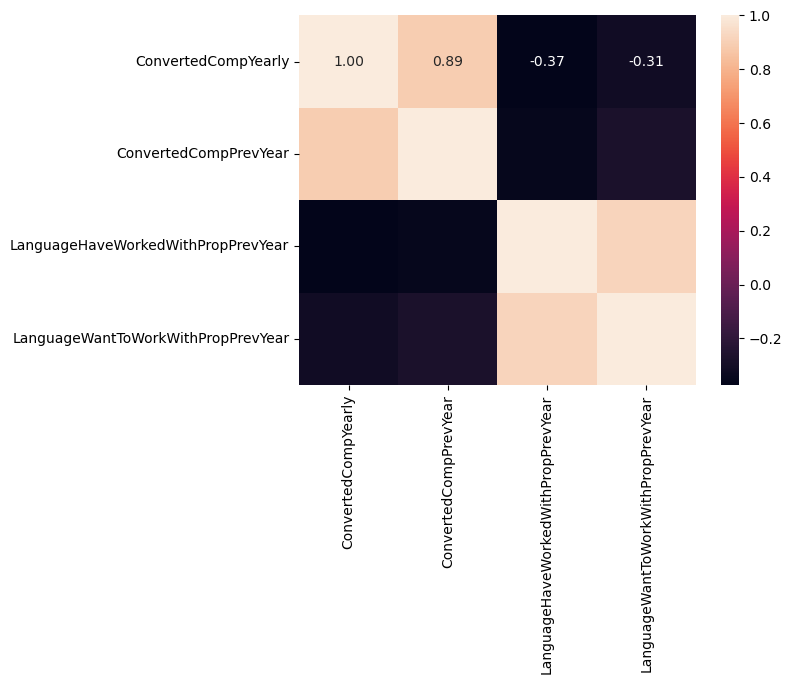

In [182]:
df_temp = df[df.ConvertedCompPrevYear != 0]
sns.heatmap(df_temp[['ConvertedCompYearly', 'ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']].corr(), annot=True, fmt=".2f");

So it looks like the previous years pay is strongly positively corelated with the next years pay and there is a weak negative correlation with the percentage popularity working with and percentage want to work with from previous year. Presumably because the more people available to work on a language the less a company will need to pay to attract candidates.

I will now look at the correlation with all previous years and see if these will help further with prediction.

In [183]:

def previous_years_cols(df, value_names, years):
    temps = []
    for val in value_names:
        for year in years:
            temp = df[df.year == year][[val, 'language']].dropna(axis=0, how='any')
            #print(type(temp))
            temp = temp.rename(columns={val: val + "_" + str(year)})
            #print(temp)
            temps.append(temp)
    
    result = pd.DataFrame(temps[0].set_index('language'))
    for i in range(1,len(temps)):
        result = result.join(temps[i].set_index('language'), how ='outer')
    return result


temp = previous_years_cols(df, ['ConvertedCompYearly', 'LanguageWantToWorkWithProp', 'LanguageHaveWorkedWithProp'], [2023, 2022, 2021, 2020, 2019]).dropna(axis=0, how='any')
temp.head()

,ConvertedCompYearly_2023,ConvertedCompYearly_2022,ConvertedCompYearly_2021,ConvertedCompYearly_2020,ConvertedCompYearly_2019,LanguageWantToWorkWithProp_2023,LanguageWantToWorkWithProp_2022,LanguageWantToWorkWithProp_2021,LanguageWantToWorkWithProp_2020,LanguageWantToWorkWithProp_2019,LanguageHaveWorkedWithProp_2023,LanguageHaveWorkedWithProp_2022,LanguageHaveWorkedWithProp_2021,LanguageHaveWorkedWithProp_2020,LanguageHaveWorkedWithProp_2019
language,,,,,,,,,,,,,,,
Assembly,78207.0,76783.0,58368.0,53448.0,52000.0,0.033811,0.031892,0.030243,0.033166,0.037483,0.044283,0.045028,0.040695,0.047362,0.048610
Bash/Shell/PowerShell,85655.0,80448.0,71093.0,66000.0,68970.0,0.291910,0.256862,0.236469,0.215264,0.246501,0.464375,0.415800,0.386373,0.340732,0.370668
C,74963.0,67550.0,54000.0,51000.0,52248.0,0.099065,0.092463,0.090524,0.090311,0.106953,0.166853,0.167123,0.166583,0.178975,0.170512
C#,74963.0,69318.0,58368.0,56774.0,58881.0,0.238034,0.240817,0.236542,0.260169,0.276411,0.292158,0.297421,0.298398,0.336227,0.331786
C++,75000.0,69318.0,54049.0,54049.0,54996.0,0.147703,0.146787,0.147183,0.150084,0.166709,0.202441,0.201866,0.199641,0.204307,0.203695


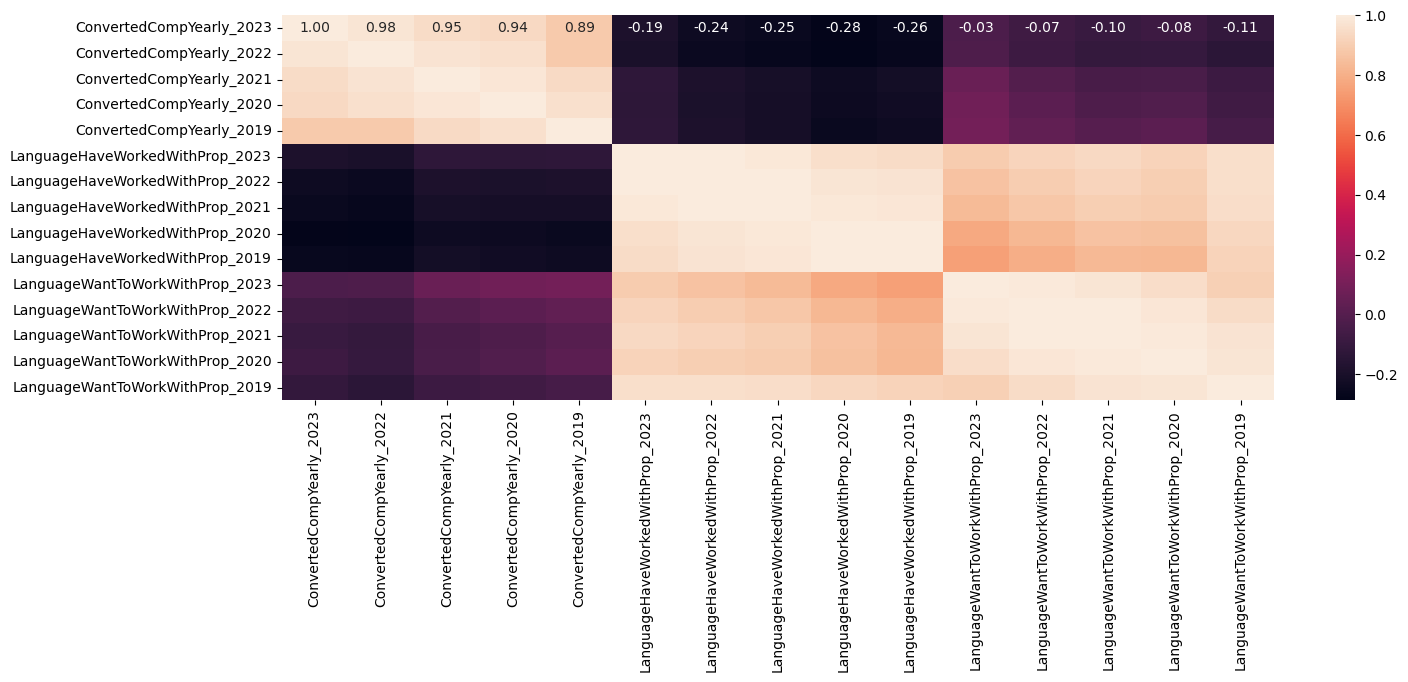

In [184]:
plt.figure(figsize=(16,5))
sns.heatmap(temp[['ConvertedCompYearly_2023', 'ConvertedCompYearly_2022', 'ConvertedCompYearly_2021', 'ConvertedCompYearly_2020', 'ConvertedCompYearly_2019',
                     'LanguageHaveWorkedWithProp_2023', 'LanguageHaveWorkedWithProp_2022', 'LanguageHaveWorkedWithProp_2021', 'LanguageHaveWorkedWithProp_2020', 'LanguageHaveWorkedWithProp_2019',
                     'LanguageWantToWorkWithProp_2023', 'LanguageWantToWorkWithProp_2022', 'LanguageWantToWorkWithProp_2021', 'LanguageWantToWorkWithProp_2020', 'LanguageWantToWorkWithProp_2019']]
            .corr(), annot=True, fmt=".2f");

we have lost some data as we have had to remove the languages that do not have full data for the last 5 years, however interestingly it has brought up a reducing positive correlation as we go back through the previous years comp, and an increasingly negative correlation as we go back through the years of languages people have worked with or wanted to work with, the loss of data has weakened these correlations and strengthened the comp correlations.

It looks like it may be best to start looking at the model just using the previous years data as more languages will be possible to predict as we will not need data going back as far.

In [185]:
# model - lm with previous year comp plus LanguageHaveWorkedWithPropPrevYear and LanguageWantToWorkWithPropPrevYear

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test = X[X.year == 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']
                
X_train = X[X.year != 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

lm_model = LinearRegression() # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.6070336380074506
50956735.053915754


In [186]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,80004.126045,87.873955
1,78207.0,85331.059474,-7124.059474
2,85655.0,87315.420973,-1660.420973
3,74963.0,74993.705209,-30.705209
4,74963.0,74527.857902,435.142098


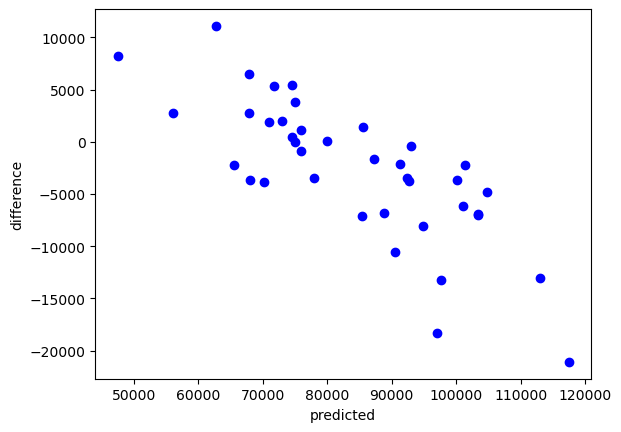

In [187]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

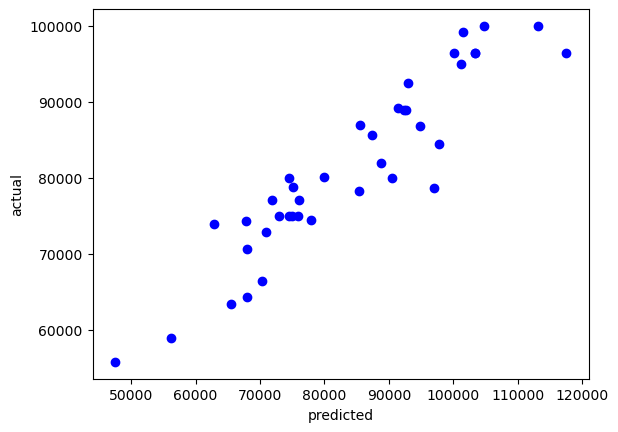

In [188]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

The R2 for the current model is fairly good but the MSE is a bit too high. I will try normalizing the variables prior to training and testing.

In [204]:
# normalize
def normalize_col(col):
    return (col-col.mean())/col.std()

# model - lm with previous year comp plus normalised LanguageHaveWorkedWithPropPrevYear and LanguageWantToWorkWithPropPrevYear

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test = X[X.year == 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_test['LanguageHaveWorkedWithPropPrevYear'] = normalize_col(X_test['LanguageHaveWorkedWithPropPrevYear'])
X_test['LanguageWantToWorkWithPropPrevYear'] = normalize_col(X_test['LanguageWantToWorkWithPropPrevYear'])

X_train = X[X.year != 2023][['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

X_train['LanguageHaveWorkedWithPropPrevYear'] = normalize_col(X_train['LanguageHaveWorkedWithPropPrevYear'])
X_train['LanguageWantToWorkWithPropPrevYear'] = normalize_col(X_train['LanguageWantToWorkWithPropPrevYear'])

lm_model = LinearRegression() # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.6276507059088541
48283278.57455346


In [190]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,81181.481079,-1089.481079
1,78207.0,83476.989013,-5269.989013
2,85655.0,83115.325011,2539.674989
3,74963.0,71891.922950,3071.077050
4,74963.0,71924.694639,3038.305361


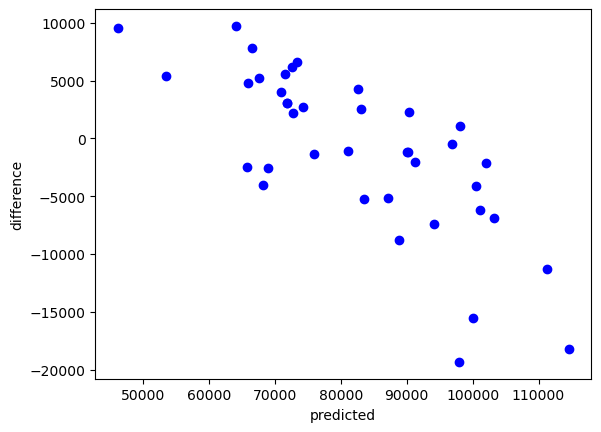

In [191]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

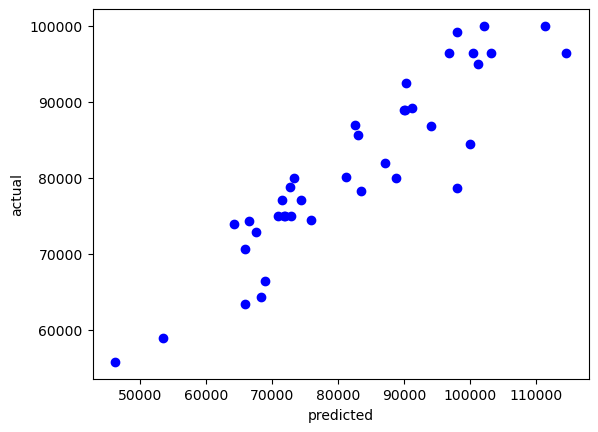

In [192]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

The new model is slightly better, but I am not convinced it would be substantially better than just predicting the salaries by outputting the previous years salaries. When tested below we can see the new model is very slightly better but not by much. Therefore with the current data we are unable to use the previous years language used popularity or language wanted to use popularity to predict next years salary. However looking back at our previous analysis we can see that there is a weak negative correlation with these that icreases as we go back further, so with more data in the same format, these two variables may become more useful predictive variables.

I will now explore the model using just the previous years comp

In [193]:

# model - using previous year comp to directly predict next year pay

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test = X[X.year == 2023]['ConvertedCompPrevYear']
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_train = X[X.year != 2023]['ConvertedCompPrevYear']
y_train = y[y.year != 2023]['ConvertedCompYearly']


print(r2_score(y_test, X_test)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, X_test)) #metrics to assess fit include Rsquared and MSE.

0.6227207880822738
48922550.89102564


In [194]:
# model - lm model with previous year comp

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test =X[X.year == 2023][['ConvertedCompPrevYear']]
y_test = y[y.year == 2023]['ConvertedCompYearly']

X_train =X[X.year != 2023][['ConvertedCompPrevYear']]
y_train = y[y.year != 2023]['ConvertedCompYearly']

lm_model = LinearRegression() # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.6721071764207454
42518519.02154721


In [195]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,78097.020976,1994.979024
1,78207.0,83747.834641,-5540.834641
2,85655.0,87766.507791,-2111.507791
3,74963.0,73623.848502,1339.151498
4,74963.0,75562.460816,-599.460816


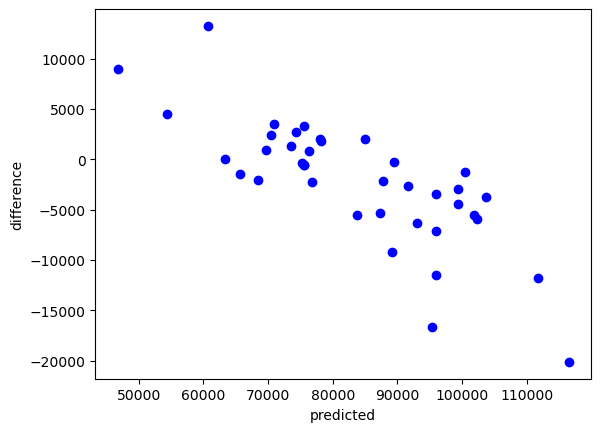

In [196]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

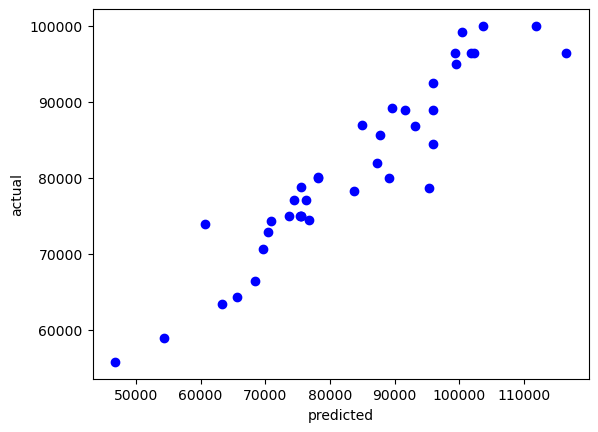

In [197]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

This model is better than the previous model where we just used the previous years comp as the prediction, however I think it will improve with a log transform on the input and output variables to reduce the slight skewing we can see and the increased variability in differences towards the top end of salaries.

In [198]:
# model - lm model with previous year comp plus log transform

X = df_temp[['ConvertedCompPrevYear', 'LanguageHaveWorkedWithPropPrevYear', 'LanguageWantToWorkWithPropPrevYear', 'year']]
y = df_temp[['ConvertedCompYearly', 'year']]

X_test =np.log(X[X.year == 2023][['ConvertedCompPrevYear']])
y_test = np.log(y[y.year == 2023]['ConvertedCompYearly'])

X_train =np.log(X[X.year != 2023][['ConvertedCompPrevYear']])
y_train = np.log(y[y.year != 2023]['ConvertedCompYearly'])

lm_model = LinearRegression() # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.
y_test = np.exp(y_test)
y_test_preds = np.exp(y_test_preds)
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.7023695395038477
38594337.80178091


In [199]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,80092.0,77486.698666,2605.301334
1,78207.0,83080.976045,-4873.976045
2,85655.0,87060.214766,-1405.214766
3,74963.0,73059.233960,1903.766040
4,74963.0,74977.930030,-14.930030


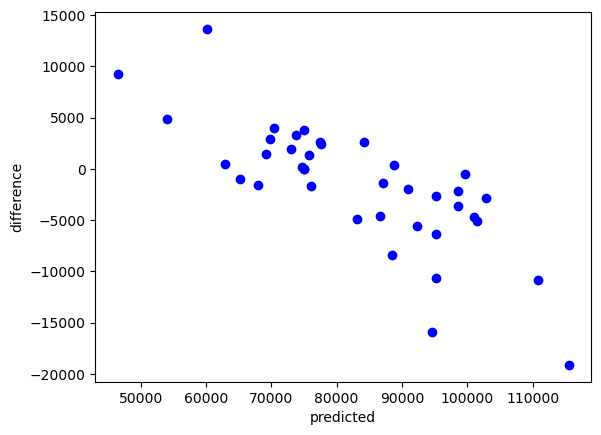

In [200]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

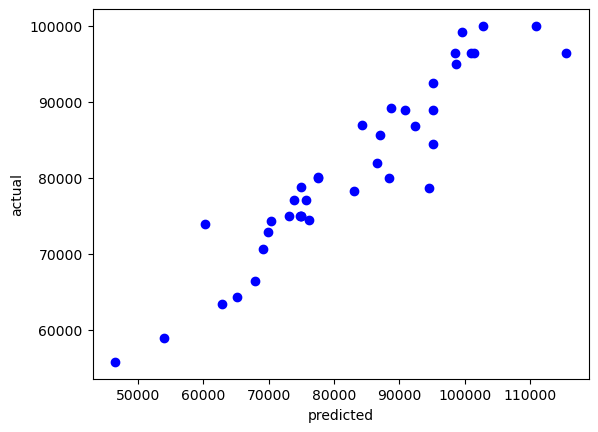

In [201]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

This model is better than the previous model without the transformation, the log transform on the input appears to have removed the issue with skewness and th log transform on the output appears to have decreased MSE.